# Programming for Data Analysis Project

Notebook for the Project for Programming for Data Analysis module @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Machine-Learning-Tasks-2020)

***

#### — Problem statement
*For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the **numpy.random** package for this purpose.*

*Specifically, in this project you should:*

• *Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*

• *Investigate the types of variables involved, their likely distributions, and their relationships with each other.*

• *Synthesise/simulate a data set as closely matching their properties as possible.*

• *Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*

*Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.*

***

#### — Cardiovascular diseases 

![Cardiovascular diseases](https://www.clearlake-specialties.com/wp-content/uploads/SystolicDiastolic_Heartfailure.5518685646fab-e1553788922847.png)

>Cardiovascular disease (CVD) is a general term for a disease of the heart or blood vessels. Blood flow to the heart, brain or body is reduced because of: a blood clot (thrombosis) a build-up of fatty deposits inside an artery, leading to hardening and narrowing of the artery (atherosclerosis). **Main Risk Factors: High blood pressure; Tobacco smoking; Diabetes** — [HSE](https://www.hse.ie/eng/health/az/c/cardiovascular-disease)

#### — Introduction

**Dataset description:**

>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
>
>Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
>
>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


#### — Content

1. Age: Age of the patient, *Measurement: Years [40 - 95]*

2. Anemia: Decrease of red blood cells or hemoglobin, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

3. High blood pressure: If a patient has hypertension, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

4. Creatinine phosphokinase (CPK): evel of the CPK enzyme in the blood, *Measurement: mcg/L  [23 - 7861]**

5. Diabetes: If the patient has diabetes, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

6. Ejection fraction: Percentage of blood leaving, *Measurement: Percentage [14 - 80]*

7. Sex : Woman or man, *Measurement: Binary [0, 1], Female = 0, Male = 1*

8. Platelets: Platelets in the blood, *Measurement: kiloplatelets/mL [25.01 - 850.00]**

9. Serum creatinine : Level of creatinine in the blood, *Measurement: mg/dL [0.50 - 9.40]**

10. Serum sodium: Level of sodium in the blood, *Measurement: mEq/L [114 - 148]**

11. Smoking: If the patient smokes, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

12. Time: Follow-up period, *Measurement: Days [4 - 285]*

13. Death event: If the patient died during the follow-up period, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

**mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre*<br>




#### — Packages

In [1]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### — Dataset

Imported Heart Failure dataset contains 299 records and 13 features. The features include sex, age, some risk factors associated to cardiovascular disease such as diabetes, high blood pressure etc., some cardiovascular metrics and death event details. Among all of them, some are boolean and some measurement values.

In [2]:
# Load dataset.
df = pd.read_csv("heart.csv")

In [4]:
# Preview of dataset.
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,75.0,55.00,65.0,50.0,65.0,90.0,75.0,60.0,65.00,80.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0,246.0,315.0,157.00,123.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0,15.0,60.0,65.00,35.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0,127000.0,454000.0,263358.03,388000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1,1.2,1.1,1.50,9.4
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0,137.0,131.0,138.00,133.0
sex,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.00,1.0


In [5]:
# Shape of dataset.
df.shape

(299, 13)

In [6]:
# Print metadata about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Have a look at some basic statistical details.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### — Standard Missing values

In [8]:
# check if dataset contains any missing values.
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### — Non-Standard Missing values

In [9]:
# check if dataset contains any missing values according to specified list.
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('heart.csv', na_values=missing_values)
df.isna().sum().sum()

0

#### — Negative values

In [10]:
# checks if dataset contains any negative values
df[(df.iloc[:,:] < 0)].sum()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

#### — Correlation

Knowing that there are no negative or standard and non-standard missing values in dataset let's have a look at distribution of features and their correlation and how can they might have determine dependence among the other.

In [11]:
# Use Pandas corr() function to check correlations between features.
corr = df.iloc[:,:].corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


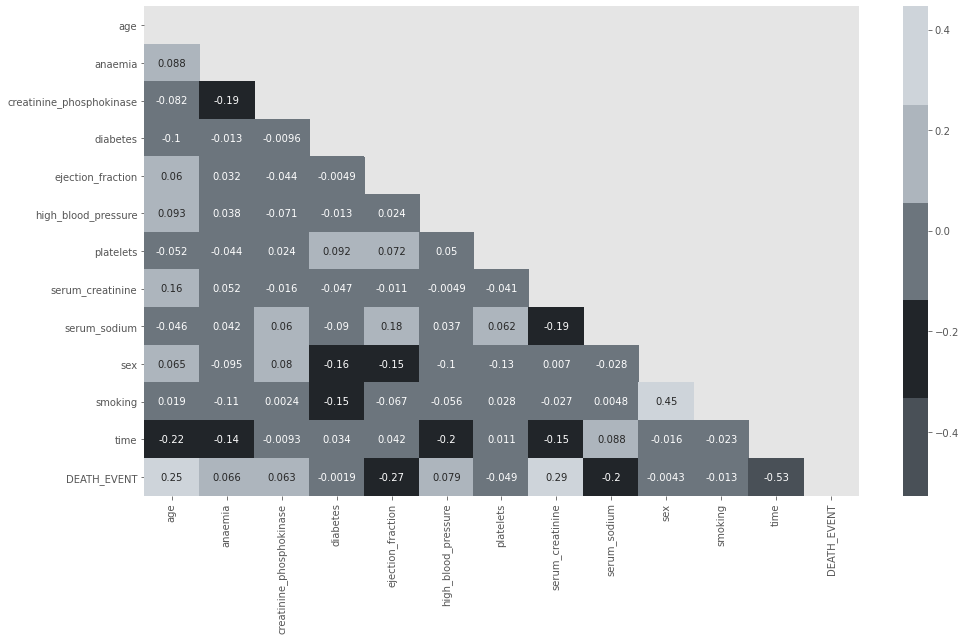

In [13]:
# For better overview of the correlation among all features let's visualize them using Seaborn heatmap.
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, annot=True, cmap=cmap);


Looking at the correlation matrix above, it clearly shows that there is no major correlation between features of dataset. Higher correlation can be noticeably observed between pairs of sex and smoking, serum creatinine and death event as well as age and death event. Let's check the histograms for those pairs. More about on how elevated serum creatinine has been associated with increased mortality of cardiovascular disease can be read in this [paper](https://pubmed.ncbi.nlm.nih.gov/9056611/).



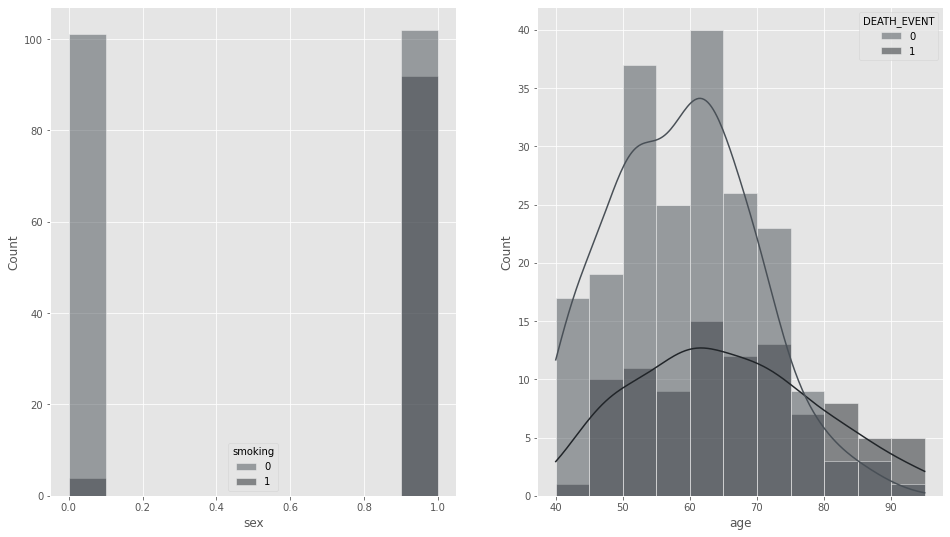

In [5]:
# Draw the plots for the most highest correlated pairs.
fig, axes = plt.subplots(1, 2)
sns.histplot(df, x="sex", hue="smoking", ax=axes[0]);
sns.histplot(df, x="age", hue="DEATH_EVENT", kde=True, bins=11, ax=axes[1]);

#### — Sex

Let's try to examine on how the risk factors  are distributed across the gender of patient which will be crucial during the process of data synthesis.

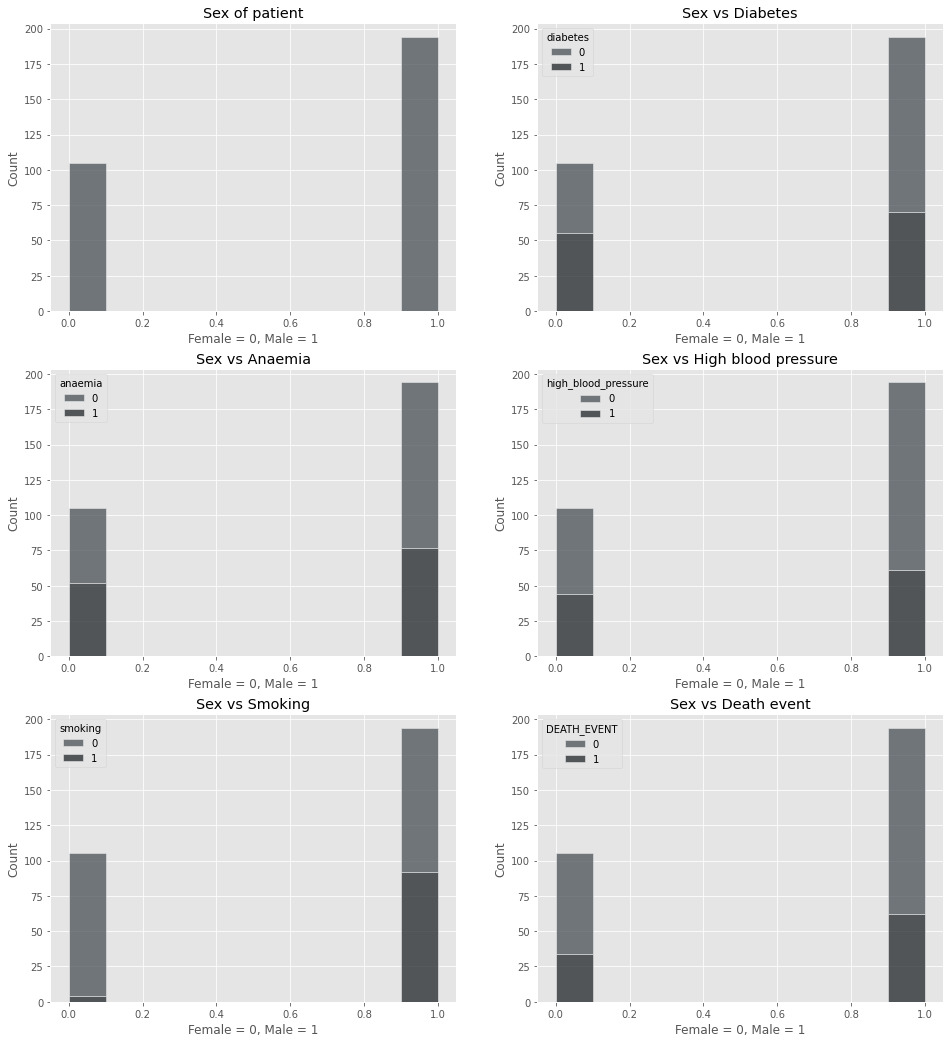

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(16,18))
sns.histplot(df, x="sex", ax=axes[0,0]).set(title='Sex of patient', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="diabetes", multiple="stack", ax=axes[0,1]).set(title='Sex vs Diabetes', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="anaemia", multiple="stack", ax=axes[1,0]).set(title='Sex vs Anaemia', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="high_blood_pressure", multiple="stack", ax=axes[1,1]).set(title='Sex vs High blood pressure', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="smoking", multiple="stack", ax=axes[2,0]).set(title='Sex vs Smoking', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="DEATH_EVENT", multiple="stack", ax=axes[2,1]).set(title='Sex vs Death event', xlabel="Female = 0, Male = 1");

#### — Risk Factors

Proportion of sex in dataset distributes roughly 65% to 35% in favour of men. There is a significant disproportion between smokers of both sexes. Only 3.8% of female are smokers compared to 87.6% of men.

Rest of risk factors are slightly less varied but still in favour of female. They have lower coefficients of diabetes, anaemia and high blood pressure. Worth noting that death event is nearly twice higher for men.


In [3]:
# Let's have a look at proportion of risk factors according to sex.
# Count gender of patients.
m, f = df['sex'].value_counts()
# p - convert to procentage, l - length of dataset
p = 100
l = len(df['sex'])

# sex of patient.
print('\n— Sex: Female: {:.0f}% | Male: {:.0f}%\n'.format((f/l)*p, (m/l)*p))

# Smokers per sex.
fs = len(df[(df['sex'] == 0) & (df['smoking'] == 1)])
ms = len(df[(df['sex'] == 1) & (df['smoking'] == 1)])
print('— Smokers: Female: {:.1f}% | Male: {:.1f}%\n'.format((fs/f)*p, (ms/f)*p))

# Diabetes per sex.
fd = len(df[(df['sex'] == 0) & (df['diabetes'] == 1)])
md = len(df[(df['sex'] == 1) & (df['diabetes'] == 1)])
print('— Diabetes: Female: {:.1f}% | Male: {:.1f}%\n'.format((fd/f)*p, (md/f)*p))

# Anaemia per sex.
fa = len(df[(df['sex'] == 0) & (df['anaemia'] == 1)])
ma = len(df[(df['sex'] == 1) & (df['anaemia'] == 1)])
print('— Anaemia: Female: {:.1f}% | Male: {:.1f}%\n'.format((fa/f)*p, (ma/f)*p))

# High blood pressure per sex.
fhbp = len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)])
mhbp = len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)])
print('— High blood pressure: Female: {:.1f}% | Male: {:.1f}%\n'.format((fhbp/f)*p, (mhbp/f)*p))

# Death event per sex.
fde = len(df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 1)])
mde = len(df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 1)])
print('— Death event: Female: {:.1f}% | Male: {:.1f}%'.format((fde/f)*p, (mde/f)*p))


— Sex: Female: 35% | Male: 65%

— Smokers: Female: 3.8% | Male: 87.6%

— Diabetes: Female: 52.4% | Male: 66.7%

— Anaemia: Female: 49.5% | Male: 73.3%

— High blood pressure: Female: 41.9% | Male: 58.1%

— Death event: Female: 32.4% | Male: 59.0%


Another factor that has to be considered while processing data synthesis is to determine number of patients per gender not having risk factors above.

In [27]:
# Determine number of patients per gender not having risk factors above
f0 = len(df[(df['sex'] == 0) & (df['anaemia'] == 0) & (df['diabetes'] == 0) & (df['high_blood_pressure'] == 0) & (df['smoking'] == 0) & (df['DEATH_EVENT'] == 0)])
m0 = len(df[(df['sex'] == 1) & (df['anaemia'] == 0) & (df['diabetes'] == 0) & (df['high_blood_pressure'] == 0) & (df['smoking'] == 0) & (df['DEATH_EVENT'] == 0)])
print('— No risk factors: Female: {:d} | Male: {:d}'.format(f0, m0))

— No risk factors: Female: 10 | Male: 12


#### — Outliers

Box plots are very useful to provide a visual summary of the data that enabling to identify outliers, the dispersion of data set and shows if data is normally distributed or skewed. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

— [Boxplot](https://en.wikipedia.org/wiki/Box_plot)


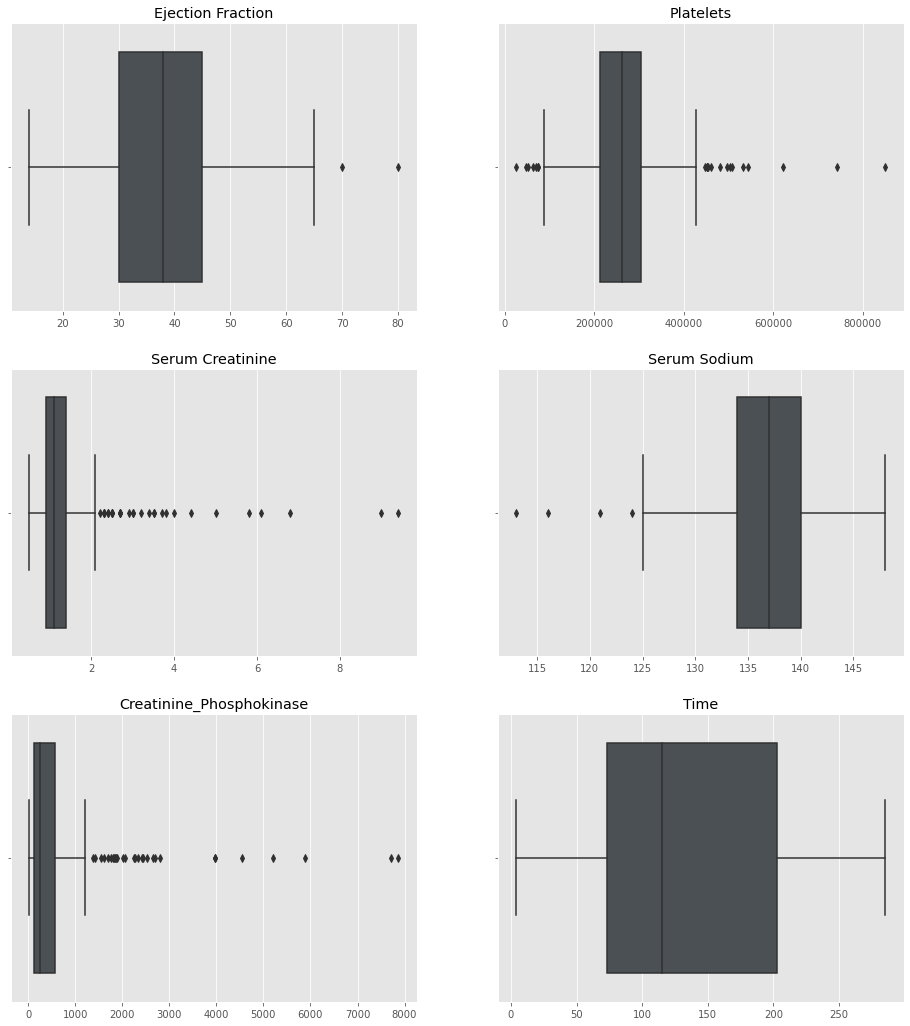

In [134]:
fig, axes = plt.subplots(3, 2, figsize=(16,18))
sns.boxplot(data=df, x=df['ejection_fraction'], ax=axes[0,0]).set(title='Ejection Fraction', xlabel="");
sns.boxplot(data=df, x=df['platelets'], ax=axes[0,1]).set(title='Platelets', xlabel="");
sns.boxplot(data=df, x=df['serum_creatinine'], ax=axes[1,0]).set(title='Serum Creatinine', xlabel="");
sns.boxplot(data=df, x=df['serum_sodium'], ax=axes[1,1]).set(title='Serum Sodium', xlabel="");
sns.boxplot(data=df, x=df['creatinine_phosphokinase'], ax=axes[2,0]).set(title='Creatinine_Phosphokinase', xlabel="");
sns.boxplot(data=df, x=df['time'], ax=axes[2,1]).set(title='Time', xlabel="");

From above box plots it can be observed that ejection fraction and serum sodium both have just a few outliers, respectively two and four. So in this case those outliers can be treated as an anomaly and reject them as they will not affect on the rest of the set.

#### — Distribution

Distribution above features look slightly skewed but this can be determined by running normality test.

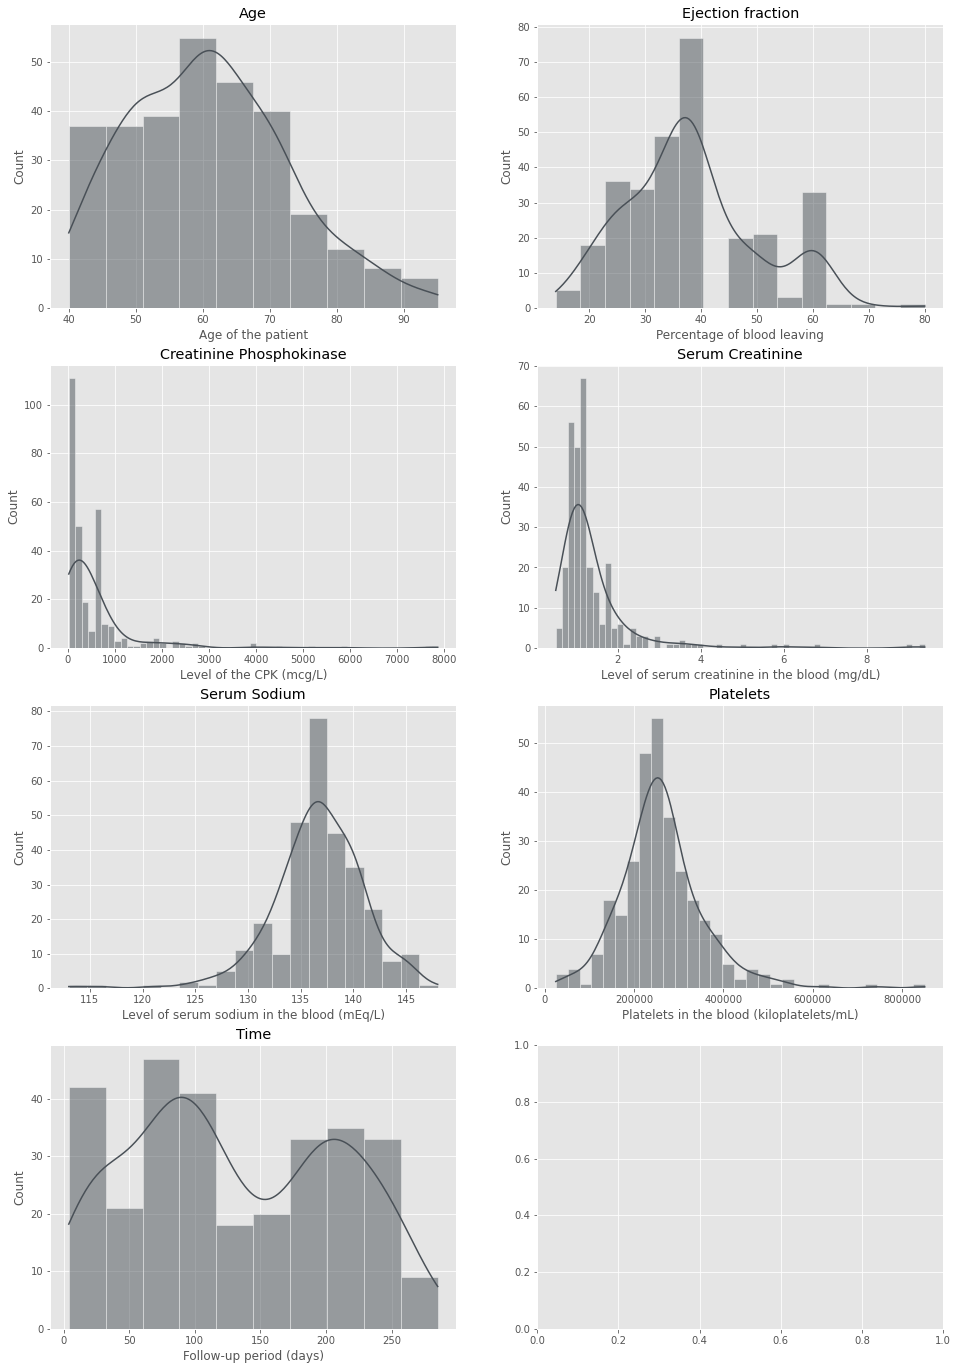

In [158]:
# Draw histograms for the features that contains measurement values.
fig, axes = plt.subplots(4, 2, figsize=(16,24))
sns.histplot(df['age'], kde=True, ax=axes[0,0]).set(title='Age', xlabel="Age of the patient");
sns.histplot(df['ejection_fraction'], kde=True, ax=axes[0,1]).set(title='Ejection fraction', xlabel="Percentage of blood leaving");
sns.histplot(df['creatinine_phosphokinase'], kde=True, ax=axes[1,0]).set(title='Creatinine Phosphokinase', xlabel="Level of the CPK (mcg/L)");
sns.histplot(df['serum_creatinine'], kde=True, ax=axes[1,1]).set(title='Serum Creatinine', xlabel="Level of serum creatinine in the blood (mg/dL)");
sns.histplot(df['serum_sodium'], kde=True, ax=axes[2,0]).set(title='Serum Sodium', xlabel="Level of serum sodium in the blood (mEq/L)");
sns.histplot(df['platelets'], kde=True, ax=axes[2,1]).set(title='Platelets', xlabel="Platelets in the blood (kiloplatelets/mL)");
sns.histplot(df['time'], kde=True, ax=axes[3,0]).set(title='Time', xlabel="Follow-up period (days)");

In [120]:
# Determine if any of the features that contains measurement values have normal distribution 
# by using D'Agostino's normality test.

# import Scipy.stats package
import scipy.stats as ss

# Columns of features that contain measurement values
columns = df.iloc[:,[0,2,4,6,7,8,11]] 

for column in columns:
    stat, p = ss.normaltest(df[column])
    print('— '+ column.capitalize())
    print('Statistics={:.3f}, p={:.3f}'.format(stat, p))

    # Set a treshold for a correctly assumed hypothesis.
    alpha = 0.05

    # Evaluation
    if p > alpha:
        print('Samples fall into normal distribution (fail to reject H0)\n')
    else:
        print('Samples do not fall into normal distribution (reject H0)\n')

— Age
Statistics=8.951, p=0.011
Samples do not fall into normal distribution (reject H0)

— Creatinine_phosphokinase
Statistics=307.184, p=0.000
Samples do not fall into normal distribution (reject H0)

— Ejection_fraction
Statistics=14.166, p=0.001
Samples do not fall into normal distribution (reject H0)

— Platelets
Statistics=111.338, p=0.000
Samples do not fall into normal distribution (reject H0)

— Serum_creatinine
Statistics=307.903, p=0.000
Samples do not fall into normal distribution (reject H0)

— Serum_sodium
Statistics=74.365, p=0.000
Samples do not fall into normal distribution (reject H0)

— Time
Statistics=174.768, p=0.000
Samples do not fall into normal distribution (reject H0)



Running above test on selected features clearly rejected all of them as normal distribution.  

In [121]:
# Performing a kolmogorov-smirnov goodness-of-fit test on all fitted distributions.
# Adopted from https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
# Prints the best fitted distribution.

# list of distributions.
distribution = ['beta','chi2','expon', 'f', 'gamma','gumbel_r',
                 'gumbel_l','laplace','logistic','lognorm','norm','pareto','powerlaw','rayleigh',
                 'cauchy','t','triang','uniform','vonmises','wald','weibull_min']

for column in columns:
    results = []
    for i in distribution:
        # Assign distribution from list.
        dist = getattr(ss, i)
        # Fit the data.
        param = dist.fit(df[column])
        # Perform Kolmogorov-Smirnov Goodness of Fit Test.
        a = ss.kstest(df[column], i, args=param)
        # Append to list.
        results.append((i,a[0],a[1]))
        
    print('\n— '+ column.capitalize())
    # Sort the list on highest p-value. 
    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results[:2]:
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

c:\users\izydom\documents\gmit\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu



— Age
logistic: statistic=0.0671840181743592, pvalue=0.12849865960210416
norm: statistic=0.06979799542131787, pvalue=0.10353190736676054


c:\users\izydom\documents\gmit\venv\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\users\izydom\documents\gmit\venv\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



— Creatinine_phosphokinase
weibull_min: statistic=0.0979842128080396, pvalue=0.0059657968142128965
lognorm: statistic=0.11495287618161976, pvalue=0.0006733125541955985

— Ejection_fraction
cauchy: statistic=0.10387458303664554, pvalue=0.002910513556217806
lognorm: statistic=0.12597079724397953, pvalue=0.00013539648615815185

— Platelets
logistic: statistic=0.06904741545108828, pvalue=0.11025125458820417
cauchy: statistic=0.07018912632082497, pvalue=0.10016724369441521

— Serum_creatinine
f: statistic=0.10643665223893506, pvalue=0.0021022900678460583
lognorm: statistic=0.12664816020043812, pvalue=0.00012209080275364168

— Serum_sodium
cauchy: statistic=0.0813001906125268, pvalue=0.03627458642101433
logistic: statistic=0.0820144630299931, pvalue=0.033808989767330266

— Time
beta: statistic=0.07155681213436083, pvalue=0.08910879130882143
t: statistic=0.10517734843397075, pvalue=0.0024692497851093757


In [8]:
# Finding on best fitted distribution with giving the parameters for the best fit.
# Adopted from https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

def get_best_distribution(data):
    dist_names = ['beta','chi2','expon', 'f', 'gamma','gumbel_r',
                 'gumbel_l','laplace','logistic','lognorm','norm','pareto','powerlaw','rayleigh',
                 'cauchy','t','triang','uniform','vonmises','wald','weibull_min','weibull_max' ]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(ss, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = ss.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    
    return best_dist, best_p, params[best_dist]

for column in columns:
    name = column
    column = df[column].to_numpy()
    
    print('\n' + name)
    get_best_distribution(column)


age
Best fitting distribution: logistic
Best p value: 0.12849865960210416
Parameters for the best fit: (60.3674585731859, 6.846529795976725)

creatinine_phosphokinase
Best fitting distribution: weibull_min
Best p value: 0.0059657968142128965
Parameters for the best fit: (0.7659582757224592, 22.999999999999996, 457.5128440867395)

ejection_fraction
Best fitting distribution: cauchy
Best p value: 0.002910513556217806
Parameters for the best fit: (36.636212878405274, 5.974450729433524)

platelets
Best fitting distribution: logistic
Best p value: 0.11025125458820417
Parameters for the best fit: (256936.77817079407, 49378.57491763865)

serum_creatinine
Best fitting distribution: f
Best p value: 0.0021022900678460583
Parameters for the best fit: (2893.471983925594, 6.625561403698908, 0.3536567220389889, 0.7033033817138006)

serum_sodium
Best fitting distribution: cauchy
Best p value: 0.03627458642101433
Parameters for the best fit: (136.86310536582977, 2.2537431759755)

time
Best fitting di

#### — Data Synthesis

##### — Sex column

In [99]:
# Start first with sex column 
# create sex columns

#setting the random generator so results can be reproduced
rng = np.random.default_rng(5)

values = [0,1] # Female = 0, Male = 1

sex = rng.choice(values, 299, p=[0.35, 0.65])
df_sample = pd.DataFrame(data=sex, columns=['sex'])

m, f = df_sample['sex'].value_counts()
m, f 
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
sex,1,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1


In [100]:
# sex occurrence
df_sample.value_counts()

sex
1      195
0      104
dtype: int64

##### — Smoking column

In [101]:
# Smoking column.
smokers = [0,1]
fs = rng.choice(smokers, f, p=[0.962, 0.038])
ms = rng.choice(smokers, f, p=[0.124, 0.876])

def smoking(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.962, 0.038]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.124, 0.876]))

df_sample['smoking'] = df_sample.apply(lambda row: smoking(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
sex,1,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1
smoking,1,1,1,0,0,1,1,0,0,1,...,1,0,1,1,1,1,0,0,1,1


In [102]:
df_sample[(df_sample['sex'] == 0) & (df_sample['smoking'] == 1)].value_counts()

sex  smoking
0    1          3
dtype: int64

##### — Diabetes column

In [103]:
# Diabetes column.
fd = rng.choice(values, 1, p=[0.476, 0.524])
md = rng.choice(values, 1, p=[0.333, 0.667])

def diabetes(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.476, 0.524]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.333, 0.667]))

df_sample['diabetes'] = df_sample.apply(lambda row: diabetes(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
sex,1,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1
smoking,1,1,1,0,0,1,1,0,0,1,...,1,0,1,1,1,1,0,0,1,1
diabetes,0,0,1,0,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,1,0


In [104]:
df_sample[(df_sample['sex'] == 1) & (df_sample['diabetes'] == 0)].value_counts().sum()

73

##### — Diabetes column

In [105]:
# Anaemia column.

def anaemia(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.505, 0.495]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.267, 0.733]))

df_sample['anaemia'] = df_sample.apply(lambda row: anaemia(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
sex,1,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1
smoking,1,1,1,0,0,1,1,0,0,1,...,1,0,1,1,1,1,0,0,1,1
diabetes,0,0,1,0,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,1,0
anaemia,1,1,1,0,0,1,1,1,0,0,...,1,0,0,1,0,1,1,0,1,1


In [106]:
df_sample[(df_sample['sex'] == 0) & (df_sample['anaemia'] == 0)].value_counts().sum()

55

##### — High blood pressure column

In [107]:
# High blood pressure column.

def high_blood_pressure(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.581, 0.419]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.419, 0.581]))

df_sample['high_blood_pressure'] = df_sample.apply(lambda row: high_blood_pressure(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
sex,1,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1
smoking,1,1,1,0,0,1,1,0,0,1,...,1,0,1,1,1,1,0,0,1,1
diabetes,0,0,1,0,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,1,0
anaemia,1,1,1,0,0,1,1,1,0,0,...,1,0,0,1,0,1,1,0,1,1
high_blood_pressure,1,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [108]:
df_sample[(df_sample['sex'] == 0) & (df_sample['high_blood_pressure'] == 0)].value_counts().sum()

57

##### — Death event column

In [109]:
# Death event column.

def death_event(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.676, 0.324]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.410, 0.590]))

df_sample['death_event'] = df_sample.apply(lambda row: death_event(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
sex,1,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1
smoking,1,1,1,0,0,1,1,0,0,1,...,1,0,1,1,1,1,0,0,1,1
diabetes,0,0,1,0,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,1,0
anaemia,1,1,1,0,0,1,1,1,0,0,...,1,0,0,1,0,1,1,0,1,1
high_blood_pressure,1,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0
death_event,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [110]:
df_sample[(df_sample['sex'] == 0) & (df_sample['death_event'] == 1)].value_counts().sum()

34

##### — Age column

In [128]:
# 
loc, scale, l = 60.3674585731859, 6.846529795976725, 299

# function takes f - function, loc, scale and lb & rb - left & right range
def bounds(f, *params, lb, rb): 
    age = []
    dist = getattr(rng, f)
    while len(age) != l:
        n = dist(loc, scale, 1).astype(int)
        if (n > lb and n < rb):
            age.append(int(n))
        else:
            continue
    return age

df_sample['age'] = pd.DataFrame(bounds('logistic',loc, scale,lb=40,rb=95))

In [129]:
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age
0,1,1,0,1,1,1,55
1,1,1,0,1,1,1,59
2,1,1,1,1,1,1,64
3,0,0,0,0,0,0,57
4,0,0,1,0,0,0,63
...,...,...,...,...,...,...,...
294,1,1,1,1,0,0,54
295,0,0,0,1,1,0,76
296,1,0,1,0,0,0,59
297,1,1,1,1,0,0,59


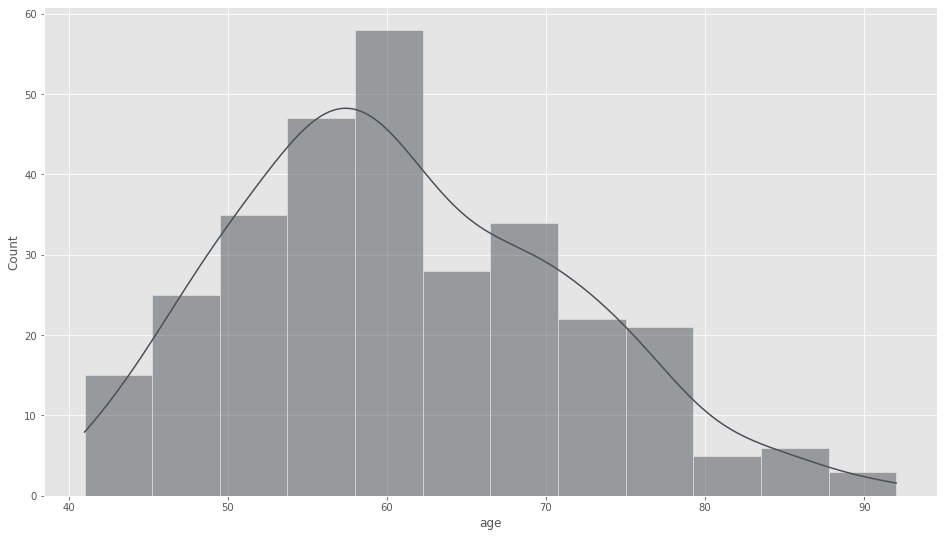

In [156]:
sns.histplot(df_sample['age'], kde=True);

##### — Serum sodium column

In [130]:
# parameters for serum sodium. 
loc, scale = 136.86310536582977, 2.2537431759755 

df_sample['serum_sodium'] = pd.DataFrame(bounds('logistic',loc, scale, lb=125,rb=148))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium
0,1,1,0,1,1,1,55,136
1,1,1,0,1,1,1,59,138
2,1,1,1,1,1,1,64,137
3,0,0,0,0,0,0,57,134
4,0,0,1,0,0,0,63,138
...,...,...,...,...,...,...,...,...
294,1,1,1,1,0,0,54,135
295,0,0,0,1,1,0,76,135
296,1,0,1,0,0,0,59,139
297,1,1,1,1,0,0,59,139


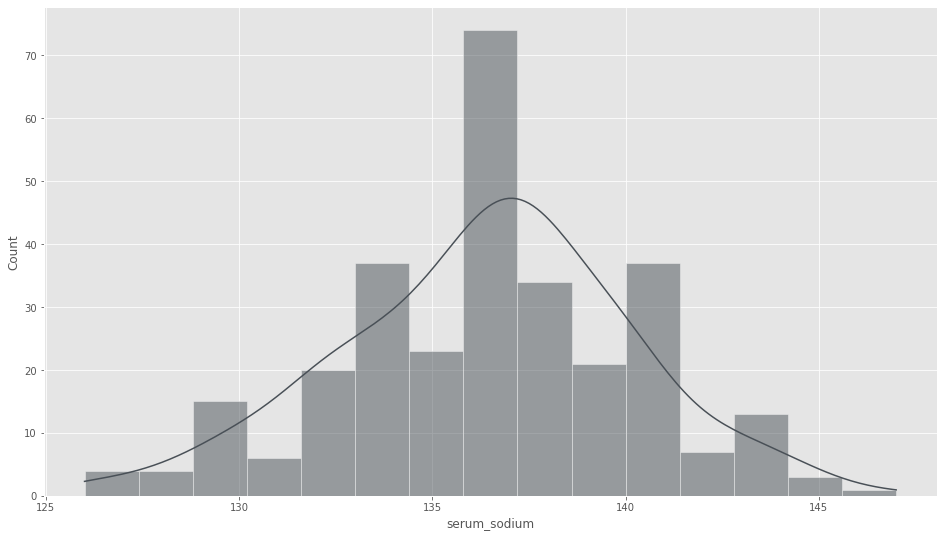

In [152]:
sns.histplot(df_sample['serum_sodium'], kde=True);

##### — Platelets column

In [135]:
# parameters for platelets. 
loc, scale = 256936.77817079407, 49378.57491763865

df_sample['platelets'] = pd.DataFrame(bounds('logistic',loc, scale, lb=0,rb=600000))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets
0,1,1,0,1,1,1,55,136,288779
1,1,1,0,1,1,1,59,138,267633
2,1,1,1,1,1,1,64,137,472028
3,0,0,0,0,0,0,57,134,417936
4,0,0,1,0,0,0,63,138,33840
...,...,...,...,...,...,...,...,...,...
294,1,1,1,1,0,0,54,135,269749
295,0,0,0,1,1,0,76,135,352229
296,1,0,1,0,0,0,59,139,455528
297,1,1,1,1,0,0,59,139,258950


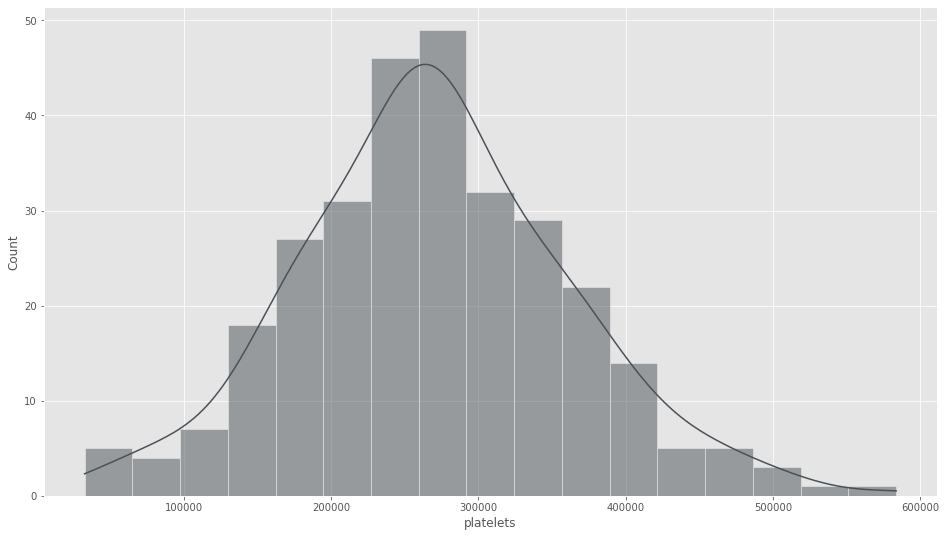

In [153]:
sns.histplot(df_sample['platelets'], kde=True);

##### — Ejection Fraction column

In [142]:
loc, scale = 38.083612, 11.834841

df_sample['ejection_fraction'] = pd.DataFrame(bounds('logistic',loc, scale, lb=14,rb=80))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets,ejection_fraction
0,1,1,0,1,1,1,55,136,288779,32
1,1,1,0,1,1,1,59,138,267633,47
2,1,1,1,1,1,1,64,137,472028,58
3,0,0,0,0,0,0,57,134,417936,46
4,0,0,1,0,0,0,63,138,33840,70
...,...,...,...,...,...,...,...,...,...,...
294,1,1,1,1,0,0,54,135,269749,40
295,0,0,0,1,1,0,76,135,352229,60
296,1,0,1,0,0,0,59,139,455528,59
297,1,1,1,1,0,0,59,139,258950,72


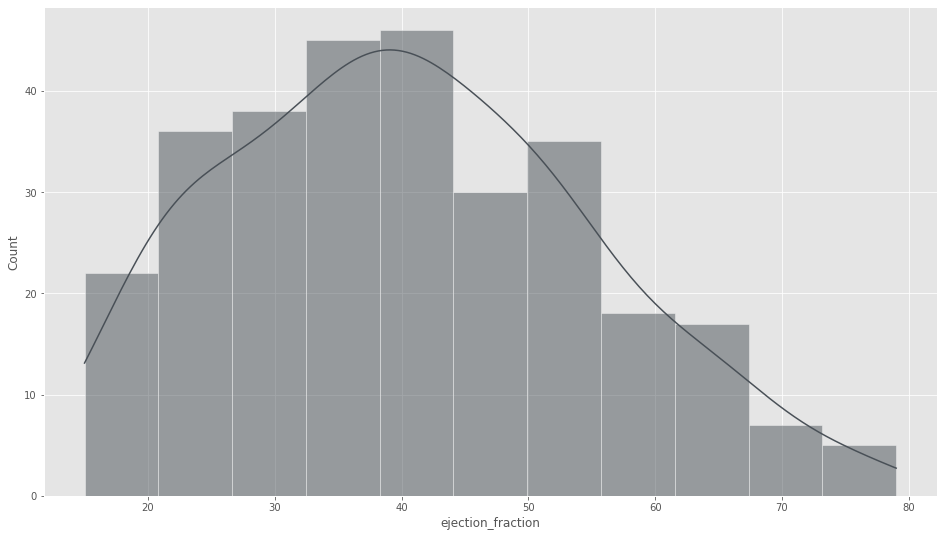

In [155]:
sns.histplot(df_sample['ejection_fraction'], kde=True);

##### — Time column